# 1. Introduction to Bokeh
Bokeh is a Python library for creating interactive visualizations for modern web browsers. It helps you build beautiful graphics, ranging from simple plots to complex dashboards with streaming datasets. With Bokeh, you can create JavaScript-powered visualizations without writing any JavaScript yourself.



# Installation and Setup

In [5]:
!pip install bokeh
!pip install bokeh_sampledata
# conda install bokeh


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing libraries

In [6]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
from bokeh.models import HoverTool
from bokeh.models import DateRangeSlider
from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import RangeTool

import numpy as np


# Configuration for notebooks
**output_notebook():**
Configure the default output state to generate output in notebook cells when show() is called. Note that show() may be called multiple times in a single cell to display multiple objects in the output cell. The objects will be displayed in order.

In [7]:
output_notebook()

Loading BokehJS ...

#Plotting Graphs

## Line Plot

In [8]:
import random

x= list(range(1, 10))
y= random.sample(range(1, 100), 9)


p = figure(title="Line Graph", x_axis_label='x', y_axis_label='y', resizable=True, width=600, height=400)
p.line(x, y, legend_label=f'y={y}', line_width=3)  # y values as legend


show(p)

## Scatter Plot

In [9]:
from bokeh.layouts import gridplot
import seaborn as sns

penguins = sns.load_dataset("penguins")
# plotting via column names of df
p = figure(title="Bill Length vs Bill Depth",
                       x_axis_label='Bill Length (mm)', y_axis_label='Bill Depth (mm)')
p.scatter('bill_length_mm', 'bill_depth_mm', size=10, color="green", alpha=0.5, source=penguins,marker="triangle")

show(p)


## Bar Graph and Grid Plot

In [10]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show



penguin_species = penguins['species'].value_counts()
species = penguin_species.index.tolist()
counts = penguin_species.values.tolist()

# In Bokeh, a ColumnDataSource acts like a data container.
# It organizes your data into columns, making it easy to link your data to visual elements in your plots.
# It essentially acts as a bridge between your data and Bokeh plots.
source = ColumnDataSource(data=dict(species=species, counts=counts))

p = figure(x_range=species, height=400, width=400,
              toolbar_location=None, tools="")
p.vbar(x='species', top='counts', width=0.6, source=source, legend_field="species",
         line_color='white', fill_color=factor_cmap('species', palette=Spectral6, factors=species))

p.title.text = "Vertical Bar Chart of Penguin Species Count"
p.title.text_font_size = "16px"

p.y_range.start = 0
p.yaxis.axis_label = 'Count'
p.xaxis.axis_label = 'Species'
p.add_tools(HoverTool(tooltips=[("Species", "@species"), ("Count", "@counts")]))


# Create the figure for the horizontal bar chart (hbar)
p2 = figure(y_range=species, height=400, width=400, toolbar_location=None, tools="")
p2.hbar(y='species', right='counts', height=0.6, source=source, legend_field="species",
        line_color='white', fill_color=factor_cmap('species', palette=Spectral6, factors=species))

# Aesthetics
p2.title.text = "Horizontal Bar Chart of Penguin Species Count "
p2.title.text_font_size = "16px"
p2.x_range.start = 0
p2.xaxis.axis_label = 'Count'
p2.yaxis.axis_label = 'Species'

# widgets : we will explore later in callbacks
p2.add_tools(HoverTool(tooltips=[("Species", "@species"), ("Count", "@counts")]))

# layout
layout = gridplot([[p, p2]])

show(layout)


# Customization


## Minimaps with column layout

In [11]:

n_points = 3000
x_values = np.linspace(0, 100, n_points)
y_values = np.random.randn(n_points).cumsum()

source = ColumnDataSource(data=dict(x=x_values, y=y_values))
# tools to use in graphs
detailed_plot = figure(
    width=800,
    height=300,
    tools=["xpan", "xzoom_in", "xzoom_out", "reset", "wheel_zoom"],
    toolbar_location="above",
    active_scroll="wheel_zoom",
    background_fill_color="#efefef",
    x_range=(22, 30),
)

detailed_plot.line("x", "y", source=source)

# Minimap
minimap = figure(
    width=detailed_plot.width,
    height=150,
    tools="",
    toolbar_location=None,
    background_fill_color=detailed_plot.background_fill_color,
    title="Mini Plot",
)

minimap.line("x", "y", source=source)
minimap.x_range.range_padding = 0
minimap.ygrid.grid_line_color = None

range_tool = RangeTool(x_range=detailed_plot.x_range, y_range=detailed_plot.y_range, start_gesture='tap')
range_tool.overlay.fill_color = "darkblue"
range_tool.overlay.fill_alpha = 0.3
range_tool.overlay.inverted = True
range_tool.overlay.use_handles = True
minimap.add_tools(range_tool)

p.legend.location = "top_right"

# curdoc().theme = "dark_minimal"
# curdoc().theme = "caliber"
# curdoc().theme = "light_minimal"
# curdoc().theme = "night_sky"
# curdoc().theme = "contrast"

show(column(detailed_plot, minimap))

## Toggling Legends

In [12]:
import pandas as pd
from bokeh.io import curdoc
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT
from bokeh.models import TabPanel, Tabs

curdoc().theme = "caliber"

# Define a list of markers to use for the scatter plot
MARKERS = ["circle", "square", "triangle"]

# Create tabs instead of plots
tabs = []
for policy in ["hide", "mute"]:
    p = figure(width=800, height=400, x_axis_type="datetime")
    p.title.text = f"{policy} functionality"
    for stocks, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
        df = pd.DataFrame(stocks)
        df["date"] = pd.to_datetime(df["date"])
        p.line(df["date"], df["close"], line_width=2, color=color, alpha=0.8, legend_label=name)

        p.legend.location = "top_left"
        p.legend.click_policy = policy

    # Create a TabPanel for each policy
    tab = TabPanel(child=p, title=policy.capitalize())
    tabs.append(tab)

# Create Tabs layout
layout = Tabs(tabs=tabs)

# Show the layout
show(layout)

## Tooltip Callbacks

In [13]:
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter, OpenURL, TapTool, ColumnDataSource, HoverTool, CustomJS
import pandas as pd

population_df = pd.DataFrame(
    {
        "country": ["China", "India", "USA", "Indonesia"],
        "population": [1412600000, 1375586000, 333340028, 275773800],
        "wikipedia_url": ["https://en.wikipedia.org/wiki/China", "https://en.wikipedia.org/wiki/India", "https://en.wikipedia.org/wiki/United_States", "https://en.wikipedia.org/wiki/Indonesia"],
    }
)
population_df

p = figure(
    x_range=population_df["country"],
    height=350,
    title="Most populous countries",
    tools="tap,hover",  # enable tap and hover tools
)
p.vbar(x="country", top="population", width=0.9, source=population_df)
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Configure the OpenURL as the tap tool's callback
url = "@wikipedia_url"  # use the URLs stored in the wikipedia_url column
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)  # define the OpenURL object as the tap tool's callback

# Add HoverTool callback to display population on hover
hover = p.select(type=HoverTool)
hover.tooltips = [("Country", "@country"), ("Population", "@population{0,0}")]  # format population with commas

# Add CustomJS callback to change bar color on click
p.js_on_event('tap', CustomJS(args=dict(source=p.renderers[0].data_source), code="""
    console.log('Button: clicked', this);
    }
"""))

show(p)

# Map Plotting

In [14]:
# load tutorial data
from tutorial_data import data

key_0 STATEFP       Name  \
0  Tennessee      47  Tennessee   
1      Texas      48      Texas   

                                            geometry   origin  destination  
0  MULTIPOLYGON (((4.64865 -3.81124, 4.65056 -3.8...   6444.0       6599.0  
1  MULTIPOLYGON (((-1.23174 -12.46305, -1.21421 -...  20465.0      20627.0

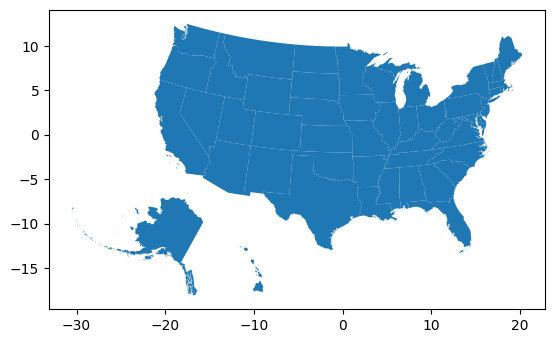

In [15]:
import geopandas as gpd


states_gdf = gpd.read_file("./data/us-states.geojson")
states_gdf.plot()
data.get_states_routes_df().head(2)
states_gdf = states_gdf.join(data.get_states_routes_df(), on=states_gdf["Name"])
states_gdf.head(2)

In [16]:
import geopandas as gpd

from bokeh.models import GeoJSONDataSource
from bokeh.palettes import Cividis
from bokeh.transform import linear_cmap

# read the geojson file containing the state shapes
states_gdf = gpd.read_file("./data/us-states.geojson")
# read the pre-processed data frame from the demo data set and join it to the state shapes
states_gdf = states_gdf.join(data.get_states_routes_df(), on=states_gdf["Name"])
# create the GeoJSONDataSource
geo_source = GeoJSONDataSource(geojson=states_gdf.to_json())

# set up the tooltips
TOOLTIPS = [
    ("State", "@Name"),
    ("# of routes departing from here", "@origin{(0,0)}"),
]

# set up the figure
map_plot = figure(
    height=600,  # set a width and height to define the aspect ratio
    width=800,
    tooltips=TOOLTIPS,
    title="Number of routes with a state as its origin (all domestic carriers)",
    x_axis_location=None,  # deactivate x-axis
    y_axis_location=None,  # deactivate y-axis
    toolbar_location=None,  # deactivate toolbar
)
map_plot.grid.grid_line_color = None  # make grid lines invisible

# draw the state polygons
us = map_plot.patches(  # use the patches method to draw the polygons of all states
    xs="xs",
    ys="ys",
    fill_color=linear_cmap(field_name="origin", palette=Cividis[256], low=states_gdf["origin"].min(), high=states_gdf["origin"].max()),  # color the states by mapping the number of routes to color values from a palette
    source=geo_source,
    line_color="darkgrey",
    line_width=1,
)

# add color bar
color_bar = us.construct_color_bar(formatter=NumeralTickFormatter(format="0,0"), height=10)
map_plot.add_layout(obj=color_bar, place="below")

show(map_plot)

#Comparision with other visualization libraries


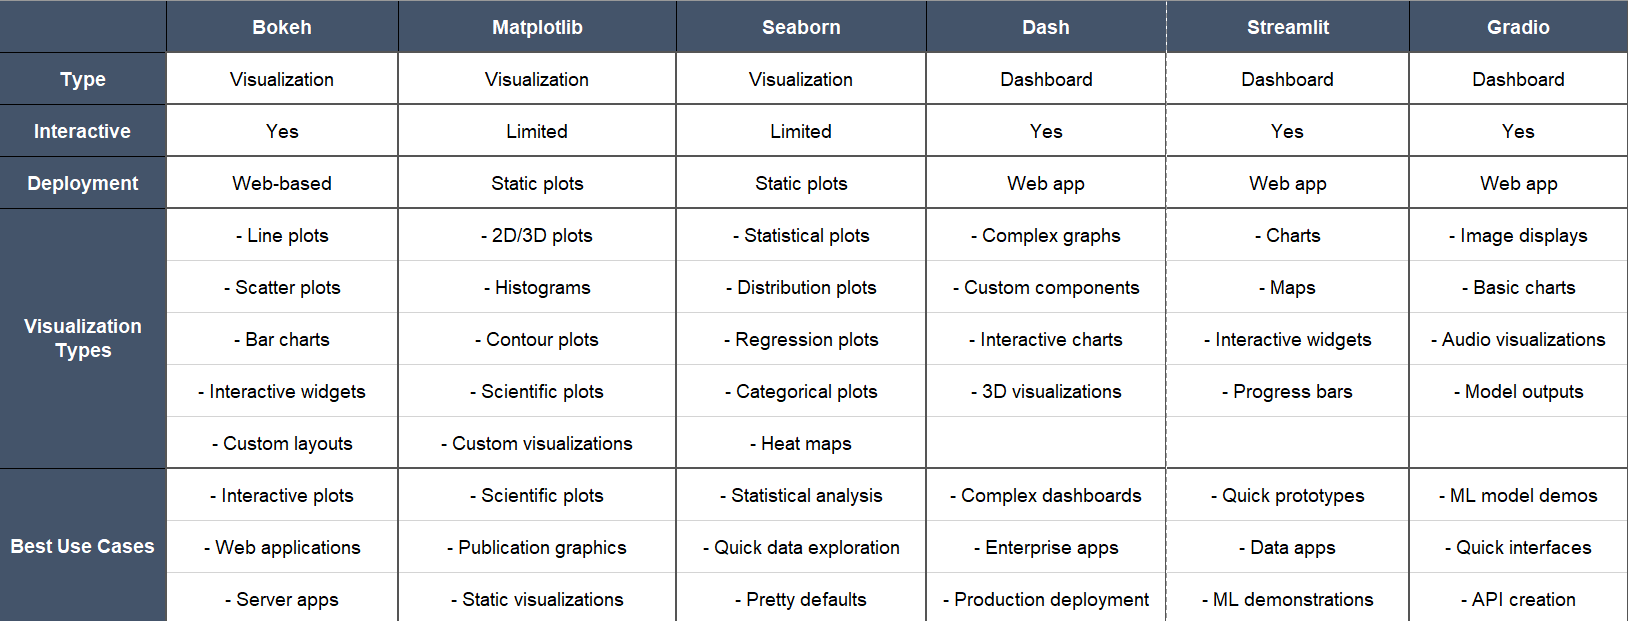